# TEXT MINING for BEGINNER
- 본 자료는 텍스트 마이닝을 활용한 연구 및 강의를 위한 목적으로 제작되었습니다.
- 본 자료를 강의 목적으로 활용하고자 하시는 경우 꼭 아래 메일주소로 연락주세요.
- 본 자료에 대한 허가되지 않은 배포를 금지합니다.
- 강의, 저작권, 출판, 특허, 공동저자에 관련해서는 문의 바랍니다.
- **Contact : ADMIN(admin@teanaps.com)**

---

## 실전 텍스트 분석하기: 단어빈도분석, 연관단어분석
- Python을 활용해 텍스트 데이터를 분석하는 여러가지 방법에 대해 다룹니다.

---

### 1. 단어빈도분석: 문서에서 단어의 출현빈도 계산하기

---

#### 1.1. 샘플 데이터 불러오기

---

In [1]:
# 기사본문을 저장할 리스트를 생성합니다.
article_list = []

file_path = "/Users/ijiseon/Desktop/ESAA-OB/article_sample.txt"

# 기사가 저장된 파일을 불러옵니다.
f = open(file_path, encoding="utf-8")
for line in f:
    col = line.strip().split("\t")
    #group = col[0]
    #source = col[1]
    #datetime = col[2]
    #title = col[3]
    # 기사의 본문만 가져와 리스트에 저장합니다.
    content = col[4]
    article_list.append(content)
f.close()

print("총 기사 수 :", len(article_list))

총 기사 수 : 100


In [2]:
print("기사샘플 :")
print(article_list[3][:1000])

기사샘플 :
10년 역사 10대 뉴스로 정리(지디넷코리아=임유경 기자)2008년 9월 리먼 브라더스 파산으로 촉발된 금융위기가 전 세계를 뒤흔들었다. 세계 금융시스템이 붕괴 위기에 놓여 있던 이때, 인터넷 세상 한 켠에선 새로운 금융 시스템이 조용하게 작동을 시작했다. 10년 전 1월 3일 오후 6시 15분. 은행이나 정부의 개입이 필요 없는 개인 간 전자화폐 시스템 비트코인 네트워크의 첫 번째 블록이 탄생한 순간이다.이날 사토시 나카모토라는 가명의 인물은 앞서 공개한 논문을 통해 제시한 아이디어를 약 한달만에 구현하는 데 성공했다. 기념비적인 첫 번째 블록에는 "재무장관, 은행에 두 번째 구제금융 제공 임박”이라는 문구를 새겼다. 이날 영국 일간지 <타임스>의 1면 헤드라인으로, 비트코인 네트워크가 기존 금융 시스템에 대안적인 성격을 띤다는 정체성을 분명하게 드러냈다.이후 비트코인은 굴곡진 10년의 세월을 보냈다. 2011년 초까지 1달러의 가치도 인정 받지 못했다. 비트코인에 대한 관심도 암호학 커뮤니티 내 개발자들이 재미로 채굴(트랜잭션을 블록단위로 묶어 처리하는 작업)하고 비트코인을 받는 수준에 그쳤다. 이후 관심을 늘었지만 투기기 불법적인 요소 결합돼 버블이니 검은 돈이니 하는 오명을 얻기도 했다.2009년 1월 3일 비트코인 첫 번째 블록인 제네시스 블록이 생성됐다.여전비 비트코인은 실험대 위에 있다. 가격이 출렁일 때마다 "비트코인은 죽었다"는 제목의 기사가 쏟아져 나온다. 지난해 언론에서 내린 사망선고는 거의 100번에 이른다. (☞관련링크)분명한 것은 비트코인의 잠재력을 믿는 사람들이 늘어나고 있다는 점이다. 이제 전 세계 모든 주요 기업들이 비트코인 기반 기술인 블록체인의 혁신성에 주목하고 기존 비즈니스에 적용하기 위해 연구에 나섰다.비트코인 맥시멀리스트로 알려진 지미 송은 최근 자신의 블로그에 비트코인이 가진 특성 중 탈중앙성(정부나 은행의 개입이 없는 상태)에 주목해야 한다고 강조하며 "기업가들은 비트코인 내에서 자신의 돈과 노력을 가지고

#### 1.2. 기사 문장을 형태소 단위로 분리하기

---

In [4]:
%%bash
apt-get update
apt-get install -y g++ openjdk-8-jdk python-dev python3-dev
pip3 install JPype1 konlpy

bash: line 1: apt-get: command not found
bash: line 2: apt-get: command not found


In [3]:
%env JAVA_HOME=/usr/local/opt/openjdk@11/libexec/openjdk.jdk/Contents/Home

env: JAVA_HOME=/usr/local/opt/openjdk@11/libexec/openjdk.jdk/Contents/Home


In [4]:
# 꼬꼬마 형태소 분석기를 불러옵니다.
from konlpy.tag import Kkma
kkma = Kkma()

text = "꼬꼬마 형태소 분석기를 불러옵니다."
print(kkma.pos(text))

[('꼬꼬마', 'NNG'), ('형태소', 'NNG'), ('분석기', 'NNG'), ('를', 'JKO'), ('불러오', 'VV'), ('ㅂ니다', 'EFN'), ('.', 'SF')]


In [16]:
# 형태소분석 후 기사단위의 형태소 리스트를 저장할 리스트를 생성합니다.
tag_sentence_list = []

# 불용어를 리스트를 정의합니다.
stop_list = ["카페", "카페규정"]

# 형태소 중 꼭 포함해야하는 형태소 태그를 리스트로 생성합니다.
pos_list = ["NNG", "NNP"]

In [17]:
now = 0
for article in article_list:
    now += 1
    print(now, end="\r")
    sentence_list = kkma.sentences(article)
    tag_sentence = []
    for sentence in sentence_list:
        tag_list = kkma.pos(sentence)
        for word, pos in tag_list:
            if pos in pos_list and word not in stop_list and len(word) > 1:
                tag_sentence.append(word)
    tag_sentence_list.append(tag_sentence)

> 해당 세부 코드 이해 

In [11]:
article_list

['금융硏 비트코인 쇠락과 내재적 결함 보고서(지디넷코리아=손예술 기자)대표적인 암호화폐 비트코인의 가격이 급변동했음에도 불구, 일부 암호화폐 옹호론자들은 비트코인이 갖고 있는 몇 가지 결함이 해소되면 새로운 국면이 나타날 것으로 예측했다.그들은 이런 결함을 전제로 국내외 정부와 감독당국은 선제적으로 시각 및 규제 환경을 정비해야 한다는 주장하고 있다.14일 한국금융연구원은 비트코인 쇠락과 내재적 결함이란 보고서에서 암호화폐 옹호론자의 입장과 함께 그들이 제시한 세 가지 결함을 발표했다.여기서 암호화폐 옹호론자들은 암호화폐로 새로운 부가가치를 낼 수 있는 사업모델 등장 가능성에 집중하고 있는 인물들로 통칭된다.그러나 그들은 이를 위해서 비트코인이 세 가지 결함이 우선적으로 해소돼야 한다고 보고 있다.하나는 비트코인이 재화와 용역을 구입하는데 사용되는 시장이 아직은 너무 좁다는 것이다. 미국 비트코인 시장조사기관인 사토시 캐피탈 리서치에 따르면 지난 2017년 기준으로 비트코인을 사용한 거래 결제액은 약 24억달러로 중국의 알리페이와 위챗페이의 거래 결제액이 약 15조달러였음을 감안하면 지나치게 적은 시장이라는 것이다.두 번째는 비트코인은 거래 건수 급증과 블록 용량 제한 등으로 채굴을 통핸 결제 처리가 지연돼, 이용자들이 거래 완료를 위해 부담해야 하는 수수료가 높아지는 문제가 있다는 것이다. 비트코인 기반 기술인 블록체인을 구성하는 각 블록 용량은 1메가바이트로 이뤄져 있고 초당 평균 거래 처리 건수는 7건이며 약 10분마다 1개 블록이 형성된다. 반면 비자의 경우 초당 거래 처리 건수는 수 만건에 달한다.세 번째로 거래소 해킹 등과 같은 사기성 거래에 아직도 노출돼 있다는 점이다. 지난 2월 캐나다 암호화폐 거래소 쿼드리가CX대표이사이자 설립자는 사망과 거액의 고객 암호화폐 분시로 파산 보호를 신청했으며 3월 파산관재인 은 비밀키를 관리했던 설립자 사망 이전 8개월 간 핫월렛에 고객의 암호화폐가 없었다고 발표했다. 핫월렛은 인터넷과 연결돼 있는 암호화폐 전

In [10]:
article0=article_list[0]

sentence_list = kkma.sentences(article0)
print(sentence_list)

['금융 硏 비트 코인 쇠락과 내재적 결함 보고서( 지 디 넷 코리아= 손예술 기자) 대표적인 암호 화폐 비트 코 인의 가격이 급변동했음에도 불구, 일부 암호 화폐 옹호론 자들은 비트 코 인이 갖고 있는 몇 가지 결함이 해소되면 새로운 국면이 나타날 것으로 예측했다.', '그들은 이런 결함을 전제로 국내외 정부와 감독당국은 선 제적으로 시각 및 규제 환경을 정비해야 한다는 주장하고 있다.14', '일 한국금융연구원은 비트 코인 쇠락과 내재적 결함이란 보고서에서 암호 화폐 옹호론자의 입장과 함께 그들이 제시한 세 가지 결함을 발표했다.', '여기서 암호 화폐 옹호론 자들은 암호 화폐로 새로운 부가가치를 낼 수 있는 사업모델 등장 가능성에 집중하고 있는 인 물들 로 통칭된다.', '그러나 그들은 이를 위해서 비트 코 인이 세 가지 결함이 우선적으로 해소돼야 한다고 보고 있다.', '하나는 비트 코 인이 재화와 용역을 구입하는데 사용되는 시장이 아직은 너무 좁다는 것이다.', '미국 비트 코인 시장조사기관인 사 토시 캐피탈 리서치에 따르면 지난 2017년 기준으로 비트 코 인을 사용한 거래 결제 액은 약 24억 달러로 중국의 알리페이와 위챗페이의 거래 결제 액이 약 15조달러였음을 감안하면 지나치게 적은 시장이라는 것이다.', '두 번째는 비트 코 인은 거래 건수 급증과 블록 용량 제한 등으로 채굴을 통 핸 결제 처리가 지연돼, 이용자들이 거래 완료를 위해 부담해야 하는 수수료가 높아 지는 문제가 있다는 것이다.', '비트 코인 기반 기술인 블록 체인을 구성하는 각 블록 용량은 1 메가 바이트로 이뤄 져 있고 초당 평균 거래 처리 건수는 7건이며 약 10분마다 1개 블록이 형성된다.', '반면 비자의 경우 초당 거래 처리 건수는 수 만건에 달한다.', '세 번째로 거래소 해킹 등과 같은 사기성 거래에 아직도 노출돼 있다는 점이다.', '지난 2월 캐나다 암호 화폐 거래소 쿼드 리가 CX 대표이사 이자 설립자는 사망과 거액의 고객 암호 화폐 분 시로 파산 보호를 신청

In [13]:
sentence0 = sentence_list[0]

tag_list = kkma.pos(sentence0)
print(tag_list)

[('금융', 'NNG'), ('硏', 'OH'), ('비트', 'NNG'), ('코', 'NNG'), ('이', 'VCP'), ('ㄴ', 'ETD'), ('쇠락', 'NNG'), ('과', 'JKM'), ('내재적', 'NNG'), ('결함', 'NNG'), ('보고서', 'NNG'), ('(', 'SS'), ('지', 'NNG'), ('디', 'NNG'), ('넷', 'NNG'), ('코리아', 'NNG'), ('=', 'SW'), ('손', 'NNG'), ('예술', 'NNG'), ('기자', 'NNG'), (')', 'SS'), ('대표적', 'NNG'), ('이', 'VCP'), ('ㄴ', 'ETD'), ('암호', 'NNG'), ('화폐', 'NNG'), ('비트', 'NNG'), ('코', 'NNG'), ('인의', 'NNG'), ('가격', 'NNG'), ('이', 'JKS'), ('급', 'NNG'), ('변동', 'NNG'), ('하', 'XSV'), ('었', 'EPT'), ('음에도', 'ECS'), ('불구', 'NNG'), (',', 'SP'), ('일부', 'NNG'), ('암호', 'NNG'), ('화폐', 'NNG'), ('옹호론', 'NNG'), ('자', 'NNG'), ('들', 'XSN'), ('은', 'JX'), ('비트', 'NNG'), ('코', 'NNG'), ('인', 'NNG'), ('이', 'JKS'), ('갖', 'VV'), ('고', 'ECE'), ('있', 'VXV'), ('는', 'ETD'), ('몇', 'MDT'), ('가지', 'NNB'), ('결함', 'NNG'), ('이', 'JKS'), ('해소', 'NNG'), ('되', 'XSV'), ('면', 'ECE'), ('새롭', 'VA'), ('ㄴ', 'ETD'), ('국면', 'NNG'), ('이', 'JKS'), ('나타나', 'VV'), ('ㄹ', 'ETD'), ('것', 'NNB'), ('으로', 'JKM'), ('예측', 'NNG'), ('하'

In [14]:
tag_sentence = []

for word, pos in tag_list:
    if pos in pos_list and word not in stop_list and len(word) > 1:
        tag_sentence.append(word)
        tag_sentence_list.append(tag_sentence)

In [15]:
print(tag_sentence)

['금융', '비트', '쇠락', '내재적', '결함', '보고서', '코리아', '예술', '기자', '대표적', '암호', '화폐', '비트', '인의', '가격', '변동', '불구', '일부', '암호', '화폐', '옹호론', '비트', '결함', '해소', '국면', '예측']


#### 1.3. 형태소 단위로 출현빈도 카운트하기

---

In [ ]:
tag_sentence_list = []

now = 0
for article in article_list:
    now += 1
    print(now, end="\r")
    sentence_list = kkma.sentences(article)
    tag_sentence = []
    for sentence in sentence_list:
        tag_list = kkma.pos(sentence)
        for word, pos in tag_list:
            if pos in pos_list and word not in stop_list and len(word) > 1:
                tag_sentence.append(word)
    tag_sentence_list.append(tag_sentence)

In [21]:
print(tag_sentence_list) 

[['금융', '비트', '쇠락', '내재적', '결함', '보고서', '코리아', '예술', '기자', '대표적', '암호', '화폐', '비트', '인의', '가격', '변동', '불구', '일부', '암호', '화폐', '옹호론', '비트', '결함', '해소', '국면', '예측', '결함', '전제', '국내외', '정부', '감독', '당국', '제적', '시각', '규제', '환경', '정비', '주장', '한국', '금융', '연구원', '비트', '쇠락', '내재적', '결함', '보고서', '암호', '화폐', '옹호론', '입장', '제시', '결함', '발표', '암호', '화폐', '옹호론', '암호', '화폐', '부가', '가치', '사업', '모델', '등장', '가능성', '집중', '통칭', '비트', '결함', '우선적', '해소', '비트', '재화', '용역', '구입', '사용', '시장', '미국', '비트', '시장', '조사', '기관', '토시', '캐피탈', '리서치', '기준', '비트', '사용', '거래', '결제', '달러', '중국', '거래', '결제', '감안', '시장', '비트', '인은', '거래', '건수', '급증', '블록', '용량', '제한', '채굴', '결제', '처리', '지연', '이용자', '거래', '완료', '부담', '수수료', '문제', '비트', '기반', '기술인', '블록', '체인', '구성', '블록', '용량', '메가', '바이트', '초당', '평균', '거래', '처리', '건수', '블록', '형성', '반면', '비자', '경우', '초당', '거래', '처리', '건수', '거래소', '해킹', '사기', '거래', '노출', '캐나다', '암호', '화폐', '거래소', '쿼드', '대표', '이사', '이자', '설립자', '사망', '거액', '고객', '암호', '화폐', '파산', '보호', '신청', '파산', '관재인', '비밀', '관

> tag_sentence_list 에는 앞에 코드를 통해 이미 기사 내에서 불용어 제외, 특정 품사 등 중요한 단어들만 넣어둠 

In [22]:
# 단어와 빈도를 쌍으로 저장할 딕셔너리를 생성합니다.
word_frequency = {}

for tag_sentence in tag_sentence_list:
    for word in tag_sentence:
        # 단어가 word_frequency의 키(key)값에 존재하는 경우 값(value)만 1을 더하고,
        # 없는 경우에는 1로 초기화합니다.
        if word in word_frequency.keys():
            word_frequency[word] += 1
        else:
            word_frequency[word] = 1

In [23]:
word_frequency

{'금융': 873,
 '비트': 554,
 '쇠락': 2,
 '내재적': 3,
 '결함': 10,
 '보고서': 61,
 '코리아': 7,
 '예술': 2,
 '기자': 130,
 '대표적': 10,
 '암호': 148,
 '화폐': 185,
 '인의': 43,
 '가격': 78,
 '변동': 74,
 '불구': 2,
 '일부': 16,
 '옹호론': 7,
 '해소': 6,
 '국면': 9,
 '예측': 8,
 '전제': 4,
 '국내외': 10,
 '정부': 103,
 '감독': 24,
 '당국': 149,
 '제적': 1,
 '시각': 16,
 '규제': 54,
 '환경': 9,
 '정비': 4,
 '주장': 22,
 '한국': 78,
 '연구원': 42,
 '입장': 12,
 '제시': 9,
 '발표': 46,
 '부가': 3,
 '가치': 58,
 '사업': 64,
 '모델': 8,
 '등장': 15,
 '가능성': 34,
 '집중': 13,
 '통칭': 2,
 '우선적': 3,
 '재화': 2,
 '용역': 1,
 '구입': 7,
 '사용': 19,
 '시장': 190,
 '미국': 65,
 '조사': 18,
 '기관': 35,
 '토시': 9,
 '캐피탈': 21,
 '리서치': 22,
 '기준': 265,
 '거래': 120,
 '결제': 48,
 '달러': 90,
 '중국': 20,
 '감안': 6,
 '인은': 75,
 '건수': 5,
 '급증': 7,
 '블록': 89,
 '용량': 2,
 '제한': 13,
 '채굴': 12,
 '처리': 16,
 '지연': 1,
 '이용자': 7,
 '완료': 2,
 '부담': 9,
 '수수료': 42,
 '문제': 29,
 '기반': 25,
 '기술인': 2,
 '체인': 95,
 '구성': 18,
 '메가': 1,
 '바이트': 1,
 '초당': 3,
 '평균': 91,
 '형성': 8,
 '반면': 12,
 '비자': 1,
 '경우': 89,
 '거래소': 54,
 '해킹': 6,
 '사기': 8,


In [24]:
# word_frequency에 저장된 단어의 빈도를 리스트에 저장하고 정렬합니다.
word_count = []
for word, freq in word_frequency.items():
    word_count.append([word, freq])
word_count.sort(key=lambda elem: elem[1], reverse=True)

In [25]:
# 단어의 빈도 상위 N개를 출력합니다.
for word, freq in word_count[:20]:
    print(word + "\t" + str(freq))

금융	873
금리	797
비트	554
부동산	519
대출	505
은행	384
기준	265
시장	190
화폐	185
자산	174
투자	170
당국	149
암호	148
신탁	133
그림자	133
기자	130
거래	120
신용	116
관련	107
정부	103


#### 1.4. 단어빈도를 활용해 워드클라우드 그리기

---

In [26]:
# 워드클라우드를 그리기 위해 wordcloud 패키지를 설치합니다.

!pip install wordcloud

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 173.2/173.2 kB 2.6 MB/s eta 0:00:00a 0:00:01


In [27]:
# wordcloud 패키지를 불러옵니다.
from wordcloud import WordCloud, ImageColorGenerator
import matplotlib.pyplot as plt

In [30]:
# 추출한 단어 리스트를 활용해 명사만으로 이루어진 문자열을 생성합니다.
noun_string = ""

# 명사를 띄어쓰기 구분자로 붙혀줍니다.
for tag_sentence in tag_sentence_list:
    # wordcloud 패키지는 연속되는 단어를 하나로 인식합니다.
    # 단어를 섞어 단어단위로 워드클라우드가 생성될 수 있도록 합니다.
    # random 패키지의 shuffle(LIST) 함수는 리스트의 순서를 랜덤으로 섞어줍니다.
    import random
    random.shuffle(tag_sentence)
    for word in tag_sentence:
        noun_string += word + " "

# 마지막에 붙은 띄어쓰기를 제거합니다.
noun_string = noun_string.strip()

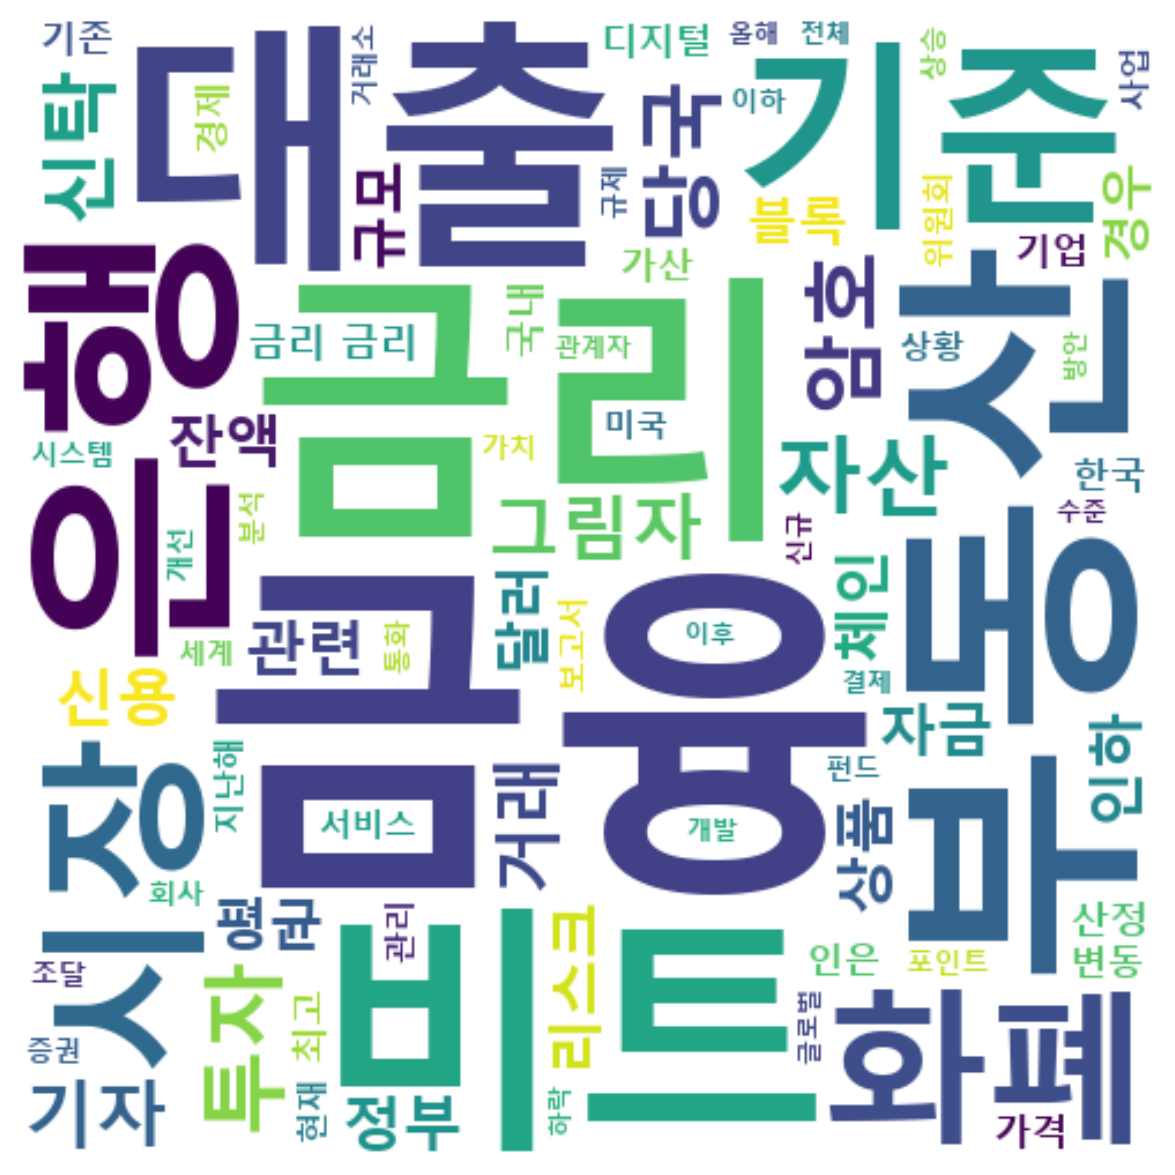

In [32]:
# 워드클라우드를 생성하고 파일로 저장합니다.
import os
username = os.getlogin()
# 폰트 파일 경로 설정
font_path = f"/Users/{username}/Library/Fonts/malgunbd.ttf"

# 워드클라우드 옵션을 선택합니다.

background_color="white"      #배경색
margin=10                     #모서리 여백 넓이
min_font_size=10              #최소 글자 크기
max_font_size=150             #최대 글자 크기
width=500                     #이미지 가로 크기
height=500                    #이미지 세로 크기
wc = WordCloud(font_path=font_path, background_color=background_color, \
               margin=margin, min_font_size=min_font_size, \
               max_font_size=max_font_size, width=width, height=height)
wc.generate(noun_string)

# 생성된 워드클라우드를 이미지로 생성합니다.
plt.figure(figsize=(15, 15))
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.show()

- 추가 폰트 작업 

In [28]:
import urllib.request

# URL에서 폰트 파일 다운로드
url = "https://github.com/taveevut/Windows-10-Fonts-Default/blob/master/malgunbd.ttf?raw=true"
file_path = "malgunbd.ttf"
urllib.request.urlretrieve(url, file_path)

('malgunbd.ttf', <http.client.HTTPMessage at 0x7fa437023760>)

In [29]:
!cp malgunbd.ttf ~/Library/Fonts/

### 2. 연관어분석: 문서에서 단어 사이의 동시출현빈도 계산하기

---

#### 2.3. 단어 기준으로 주변단어 출현빈도 카운트하기
- 2.1, 2.2 과정은 1.1, 1.2 과정과 동일하므로 생략합니다.

---

In [33]:
# 연관어를 알아볼 키워드를 지정합니다.
# 키워드는 문서에 반드시 포함된 단어만 지정해야합니다.
keyword = "금리"

# 연관단어와 그 출현빈도를 저장할 딕셔너리를 생성합니다.
co_frequency = {}

for tag_sentence in tag_sentence_list:
    if keyword not in tag_sentence:
        continue
    index = tag_sentence.index(keyword)
    # 연관단어의 정의을 keyword 앞, 뒤의 3단어까지 포함된 단어로 지정합니다.
    window = 3
    co_word_list = tag_sentence[index-window:index+window+1]
    for word in co_word_list:
        # 단어가 co_frequency 키(key)값에 존재하는 경우 값(value)만 1을 더하고,
        # 없는 경우에는 1로 초기화합니다.
        if word in co_frequency.keys():
            co_frequency[word] += 1
        else:
            co_frequency[word] = 1

# co_frequency에 저장된 단어의 빈도를 리스트에 저장하고 정렬합니다.
co_word_list = []
for i, j in co_frequency.items():
    co_word_list.append((i, j))
co_word_list.sort(key=lambda elem: elem[1], reverse=True)

# 연관단어의 빈도 상위 N개를 출력합니다.
for word, frequency in co_word_list[:10]:
    print(word + "\t" + str(frequency))

금리	40
금융	10
기준	8
대출	6
신용	6
기존	5
고정	4
중도	3
잔액	3
은행	3


#### 2.4. 연관단어의 동시출현빈도를 활용해 워드클라우드 그리기

---

In [34]:
# wordcloud 패키지를 불러옵니다.
from wordcloud import WordCloud, ImageColorGenerator
import matplotlib.pyplot as plt

In [35]:
# 추출한 연관단어 리스트를 활용해 명사만으로 이루어진 문자열을 생성합니다.
noun_string = ""

# 명사를 띄어쓰기 구분자로 붙혀줍니다.
noun_list = []
for word, frequency in co_word_list[:10]:
    for i in range(frequency):
        noun_list.append(word)

# wordcloud 패키지는 연속되는 단어를 하나로 인식합니다.
# 단어를 섞어 단어단위로 워드클라우드가 생성될 수 있도록 합니다.
# random 패키지의 shuffle(LIST) 함수는 리스트의 순서를 랜덤으로 섞어줍니다.
import random
random.shuffle(noun_list)

for word in noun_list:
    noun_string += word + " "

# 마지막에 붙은 띄어쓰기를 제거합니다.
noun_string = noun_string.strip()

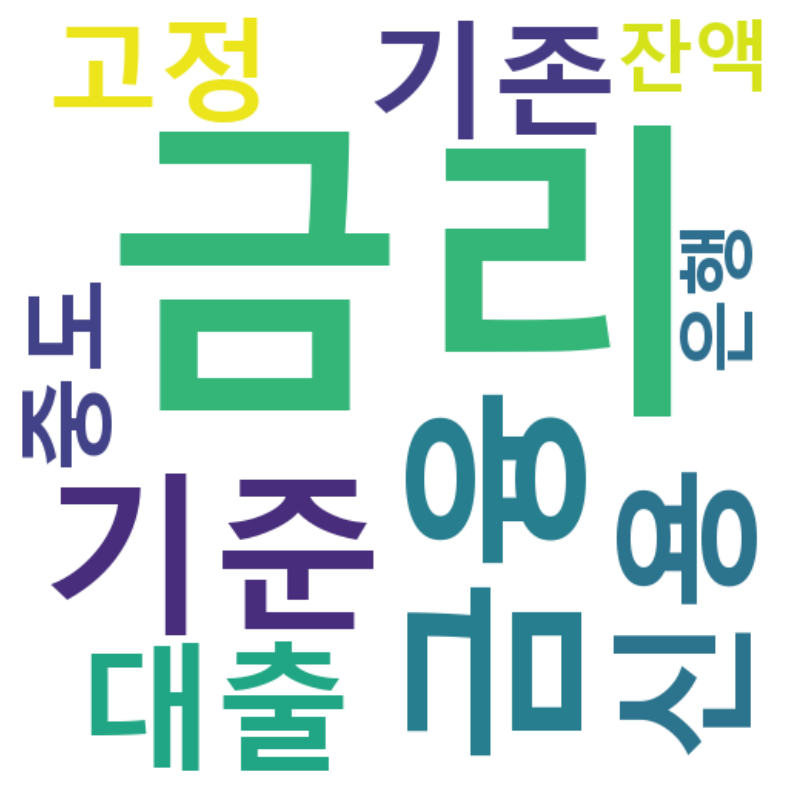

In [36]:
# 워드클라우드를 생성하고 파일로 저장합니다.
import os
username = os.getlogin()
# 폰트 파일 경로 설정
font_path = f"/Users/{username}/Library/Fonts/malgunbd.ttf"


background_color="white"      #배경색
margin=10                     #모서리 여백 넓이
min_font_size=20              #최소 글자 크기
max_font_size=200             #최대 글자 크기
width=500                     #이미지 가로 크기
height=500                    #이미지 세로 크기
wc = WordCloud(font_path=font_path, background_color=background_color, \
               margin=margin, min_font_size=min_font_size, \
               max_font_size=max_font_size, width=width, height=height)
wc.generate(noun_string)

# 생성된 워드클라우드를 이미지로 생성합니다.
plt.figure(figsize=(10, 10))
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.show()